In [ ]:
!pip install scikit-commpy

In [ ]:
import numpy as np
import commpy.channelcoding.turbo as cx
import commpy.channelcoding.interleavers as ci
import commpy.channelcoding.convcode as cc
from numpy import array, arange, zeros
from random import *
from array import *
import commpy.modulation as m
import commpy.channels as cch

In [ ]:
randBin = lambda n: [randint(0,1) for b in range(1,n+1)]


In [ ]:
memory = np.array([2])
g_matrix = np.array([[0o5, 0o7]])
trellis = cc.Trellis(memory, g_matrix)
trellis.k =1 
trellis.n = 3
#trellis.number_states=0
#trellis.number_inputs = 0
#trellis.total_memory = 0
tb_depth=5*(memory.sum()+1)

In [ ]:
dataset=[]

for i in range(22000):
  x=np.array(randBin(64))
  dataset.append(x)
  
dataset=np.array(dataset)

testdata=dataset[0:2000]
dataset=dataset[2000:]
print(dataset)
print(dataset.shape)

[[0 0 0 ... 0 1 1]
 [1 1 0 ... 0 0 0]
 [0 1 0 ... 0 1 1]
 ...
 [0 1 1 ... 1 1 0]
 [0 0 1 ... 0 1 0]
 [0 0 0 ... 1 1 1]]
(20000, 64)


In [ ]:
#Define an arbitrary filter

f=[-1.7792944 + 0.5910477j  , 1.60903698 - 0.36520366j , 0.26840385+0.37321121j,
 -0.02563482-0.29636678j , 0.85723608+1.23391568j,  1.0010208 +0.17803829j,
  0.09328626+0.17552262j]

In [ ]:
f=np.array(f)
print(f)

[-1.7792944 +0.5910477j   1.60903698-0.36520366j  0.26840385+0.37321121j
 -0.02563482-0.29636678j  0.85723608+1.23391568j  1.0010208 +0.17803829j
  0.09328626+0.17552262j]


In [ ]:
def add_channel(modulated):
  y=np.convolve(f,modulated,'full')
  return y

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pdb

def lms(u, d, M, step, leak=0, initCoeffs=None, N=None, returnCoeffs=False):

  if N is None:
      N = len(u)-M+1
      #print(N)

  initCoeffs = np.zeros(M)

  # Initialization
  y = np.zeros(N) # Filter output
  e = np.zeros(N) # Error signal
  w = initCoeffs  # Initialise equaliser
  leakstep = (1 - step*leak)
  if returnCoeffs:
      W = np.zeros((N, M)) # Matrix to hold coeffs for each equaliser step

  # Equalise
    
    

  for n in range(N):
        #print(n)

        x = np.flipud(u[n:n+M]) # 

        y[n] = np.dot(x, w)

        e[n] = d[n] - y[n]

        w = leakstep * w + step * x * e[n]

        y[n] = np.dot(x, w)

        if returnCoeffs:
            W[n] = w

        if returnCoeffs:
            w = W
        #print(w)
        #print(np.sqrt(np.dot(e,e.T)/N).real)

  return y, e, w

In [ ]:
encoded=[]
for i in range(dataset.shape[0]):
  x=dataset[i]
  y = cc.conv_encode(x,trellis)
  encoded.append(y)
  
  
encoded=np.array(encoded)

print(encoded.shape)
print(dataset.shape)
dataset=dataset.reshape(dataset.shape[0],1,dataset.shape[1])

(20000, 198)
(20000, 64)


In [ ]:
encoded_test=[]
for i in range(testdata.shape[0]):
  x=testdata[i]
  y = cc.conv_encode(x,trellis)
  encoded_test.append(y)
  
  
encoded_test=np.array(encoded_test)
testdata=testdata.reshape(testdata.shape[0],1,testdata.shape[1])

print(encoded_test.shape)

(2000, 198)


In [ ]:
#Encoding
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense,BatchNormalization
model1 = Sequential()
model1.add(Bidirectional(LSTM(800, return_sequences=True,
               input_shape=(1, 64))))  
model1.add(BatchNormalization())  
model1.add(Bidirectional(LSTM(800)))  
model1.add(BatchNormalization())
model1.add(Dense(198, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

#model1.summary()

Using TensorFlow backend.
W0617 10:06:47.689884 140621898737536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0617 10:06:47.745114 140621898737536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [ ]:
dataset.shape
print(encoded.shape)

(20000, 198)


In [ ]:
history=model1.fit(x=dataset, y=encoded, batch_size=1000, epochs=50, verbose=1, validation_split=0.1 ,shuffle=True)

W0617 10:06:57.917579 140621898737536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 10:06:57.929904 140621898737536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0617 10:07:01.864225 140621898737536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0617 10:07:06.013781 140621898737536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0617 10:07:06.021796 140621898737536 deprecation.py:

Train on 18000 samples, validate on 2000 samples
Epoch 1/50
18000/18000 [==============================] - 11s 602us/step - loss: 0.6913 - acc: 0.5695 - val_loss: 0.6320 - val_acc: 0.6308
Epoch 2/50
18000/18000 [==============================] - 3s 140us/step - loss: 0.5467 - acc: 0.7280 - val_loss: 0.4918 - val_acc: 0.7664
Epoch 3/50
18000/18000 [==============================] - 3s 142us/step - loss: 0.3979 - acc: 0.8266 - val_loss: 0.3717 - val_acc: 0.8131
Epoch 4/50
18000/18000 [==============================] - 3s 140us/step - loss: 0.3191 - acc: 0.8517 - val_loss: 0.3227 - val_acc: 0.8306
Epoch 5/50
18000/18000 [==============================] - 3s 141us/step - loss: 0.2801 - acc: 0.8671 - val_loss: 0.2918 - val_acc: 0.8428
Epoch 6/50
18000/18000 [==============================] - 3s 142us/step - loss: 0.2516 - acc: 0.8789 - val_loss: 0.2664 - val_acc: 0.8530
Epoch 7/50
18000/18000 [==============================] - 3s 142us/step - loss: 0.2276 - acc: 0.8920 - val_loss: 0.2442 - 

In [ ]:
model1.evaluate(x=testdata,y=encoded_test)

2000/2000 [==============================] - 1s 359us/step


[0.0009055859679356217, 1.0]

In [ ]:
encoded_lstm = np.array(np.round(model1.predict(dataset)),dtype=np.int32)

In [ ]:
print(encoded_lstm)
print(encoded)

[[0 0 0 ... 0 1 1]
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]
[[0 0 0 ... 0 1 1]
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]


In [ ]:
print(encoded_lstm.shape)

(20000, 198)


In [ ]:
noise_lstm = np.zeros((820000,105)) + 1j*np.zeros((820000,105))
noise_vit = np.zeros((820000,105)) + 1j*np.zeros((820000,105))
mod_vit = np.zeros((820000,99)) + 1j*np.zeros((820000,99))
y_l=0
psk=m.PSKModem(4)
y_c=0
snr=[]
for i in range(41):
  snr.append(i)
  
print(snr)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


In [ ]:
k=-1
for s in snr:
  for i in range(encoded.shape[0]):
      k=k+1
      y_l=psk.modulate(encoded_lstm[i])
      y_l = add_channel(y_l)
      y_l = cch.awgn(y_l,s)
      noise_lstm[k] = y_l

      y_c=psk.modulate(encoded[i])
      mod_vit[k]=y_c
      y_c = add_channel(y_c)
      y_c = cch.awgn(y_c,s)
      noise_vit[k]= y_c
    
print(noise_lstm)
print(noise_vit)
print(mod_vit)

[[-1.04011157e+00-0.96096858j -2.41174138e+00-3.10037797j
   5.19367922e+00+0.79217503j ... -1.51578306e-01-2.90940868j
   1.09200127e-01+0.45510932j -1.63007971e-01-2.13220449j]
 [-9.29388041e-01+1.84198783j  1.50118287e+00-5.89517981j
   3.61314797e+00+0.43023843j ...  1.20523505e+00+0.81336852j
   2.54061596e+00-1.35863968j  1.26653545e+00-1.01197169j]
 [ 3.25783387e+00+0.5698351j   3.32344384e-01+0.65802276j
   4.84914081e+00-2.44883722j ...  1.10903992e-01-3.8617894j
   1.33723828e+00+0.03158615j  1.75012505e+00+1.36845145j]
 ...
 [ 5.64390815e-01+1.75735372j  2.43008600e-01+0.1783995j
   1.80806220e+00-2.45571225j ...  1.16543148e+00+0.31381558j
   3.12684328e-03-0.8965887j   1.72636695e-01-0.07935398j]
 [ 5.74036982e-01+1.76078048j  2.56478009e-01+0.16861994j
   5.76089210e-01-0.14110323j ...  1.17909662e+00+0.3371417j
   1.55318723e-02-0.87934878j  1.85206603e-01-0.09904088j]
 [ 5.74821694e-01+1.77843817j  2.60680612e-01+0.14083577j
   5.97910227e-01-0.0718909j  ... -5.68290771

In [ ]:
noise_lstm_inp = np.zeros((820000,2,105),dtype=np.float32)
noise_lstm.shape

(820000, 105)

In [ ]:
for i in range(noise_lstm.shape[0]):
  noise_lstm_inp[i][0]=noise_lstm[i].real
  noise_lstm_inp[i][1]=noise_lstm[i].imag

In [ ]:
dataset=dataset.reshape(20000,64)
dt=np.zeros((820000,64))

for i in range(41):
  dt[i*20000:(i+1)*20000]=dataset
  
print(dt.shape)
print(noise_lstm_inp)

(820000, 64)
[[[-1.0401115e+00 -2.4117415e+00  5.1936793e+00 ... -1.5157831e-01
    1.0920013e-01 -1.6300797e-01]
  [-9.6096855e-01 -3.1003780e+00  7.9217505e-01 ... -2.9094086e+00
    4.5510933e-01 -2.1322045e+00]]

 [[-9.2938805e-01  1.5011829e+00  3.6131480e+00 ...  1.2052350e+00
    2.5406160e+00  1.2665354e+00]
  [ 1.8419878e+00 -5.8951797e+00  4.3023843e-01 ...  8.1336850e-01
   -1.3586397e+00 -1.0119717e+00]]

 [[ 3.2578340e+00  3.3234438e-01  4.8491406e+00 ...  1.1090399e-01
    1.3372383e+00  1.7501251e+00]
  [ 5.6983513e-01  6.5802276e-01 -2.4488373e+00 ... -3.8617895e+00
    3.1586152e-02  1.3684515e+00]]

 ...

 [[ 5.6439084e-01  2.4300860e-01  1.8080622e+00 ...  1.1654315e+00
    3.1268434e-03  1.7263669e-01]
  [ 1.7573537e+00  1.7839950e-01 -2.4557123e+00 ...  3.1381556e-01
   -8.9658868e-01 -7.9353981e-02]]

 [[ 5.7403696e-01  2.5647801e-01  5.7608920e-01 ...  1.1790966e+00
    1.5531872e-02  1.8520661e-01]
  [ 1.7607805e+00  1.6861993e-01 -1.4110324e-01 ...  3.3714169e-

In [ ]:
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense,BatchNormalization, Dropout
from keras.callbacks import EarlyStopping

model2 = Sequential()
model2.add(Bidirectional(LSTM(800, return_sequences=True,
               input_shape=(2, 105))))
#model2.add(Dropout(0.05))
model2.add(BatchNormalization())  
model2.add(Bidirectional(LSTM(800)))
#model2.add(Dropout(0.01))
model2.add(BatchNormalization())
model2.add(Dense(64, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
randomize = np.arange(820000)
np.random.shuffle(randomize)
x = noise_lstm_inp[randomize]
y = dt[randomize]

print(x)
print(y)


[[[-1.9527283   0.8558607   0.11514553 ...  1.2540605   0.02314717
    0.30929205]
  [ 0.35895437 -2.1641905   0.33228093 ...  0.17654578 -1.1504395
   -0.5704881 ]]

 [[-1.7630405   0.98001754  0.03783542 ...  1.5345184   0.29851937
    0.16012096]
  [ 0.614659   -2.1295605   0.24498786 ... -1.9593947  -1.0720073
   -0.08471724]]

 [[-1.8655496   0.82590395 -0.82519424 ...  0.6081118  -0.20382725
    0.08993047]
  [ 0.6746531  -1.747569    2.2441685  ...  0.7379636  -0.29315418
    0.20558575]]

 ...

 [[-2.8522878   2.183634   -1.4870509  ... -0.41439894 -0.85290456
    0.7891348 ]
  [ 0.9009489   3.6585555  -4.4181404  ... -1.423339    1.6245722
   -2.0094218 ]]

 [[ 0.73768836  0.31961715  1.8485113  ...  1.1731714   0.07175017
    0.12144542]
  [ 1.7157925   0.21755186 -2.485336   ...  0.27213457 -0.86132693
   -0.02198214]]

 [[ 0.65022856  0.28699118  1.7409092  ... -0.5899379  -0.84096336
   -0.25583428]
  [ 1.7950004   0.01579049 -2.490728   ... -2.0155473  -0.24310696
   -0.3

In [ ]:
y=y.astype(int)

In [ ]:
earlystop=EarlyStopping(monitor='val_loss', patience=1, verbose=1)

In [ ]:
history=model2.fit(x=x, y=y, batch_size=1000, epochs=50, verbose=1, validation_split=0.1 , callbacks=[earlystop], shuffle=True)


Train on 738000 samples, validate on 82000 samples
Epoch 1/50
738000/738000 [==============================] - 186s 252us/step - loss: 0.0780 - acc: 0.9703 - val_loss: 0.0366 - val_acc: 0.9858
Epoch 2/50
738000/738000 [==============================] - 180s 244us/step - loss: 0.0258 - acc: 0.9902 - val_loss: 0.0303 - val_acc: 0.9884
Epoch 3/50
738000/738000 [==============================] - 179s 243us/step - loss: 0.0150 - acc: 0.9944 - val_loss: 0.0310 - val_acc: 0.9890
Epoch 00003: early stopping


In [ ]:
noise_lstm_test = np.zeros((82000,105)) + 1j*np.zeros((82000,105))
noise_vit_test = np.zeros((82000,105)) + 1j*np.zeros((82000,105))
mod_vit_test = np.zeros((82000,99)) + 1j*np.zeros((82000,99))

y_l=0
psk=m.PSKModem(4)
y_c=0
print(snr)
encoded_lstm_test=np.array(np.round(model1.predict(testdata.reshape(2000,1,64))),dtype=np.int32)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


In [ ]:
k=-1
for s in snr:
  for i in range(encoded_test.shape[0]):
      k=k+1
      y_l=psk.modulate(encoded_lstm_test[i])
      y_l = add_channel(y_l)
      y_l = cch.awgn(y_l,s)
      noise_lstm_test[k] = y_l

      y_c=psk.modulate(encoded_test[i])
      mod_vit_test[k]=y_c
      y_c = add_channel(y_c)
      y_c = cch.awgn(y_c,s)
      noise_vit_test[k]= y_c
    
print(noise_lstm_test)
print(noise_vit_test)
print(mod_vit_test)

[[ 3.07057718e+00+3.20080693j  1.09347704e+00-1.4704402j
   2.88023896e+00+3.40563474j ...  7.96283347e-01-3.40558496j
  -1.38985649e-01-0.91069221j  2.55783549e+00-1.7132587j ]
 [ 2.48164256e+00+3.06870097j -3.17203400e-01-0.32088976j
   2.74982775e+00+0.26732112j ... -4.98545180e-03-1.762383j
  -6.32585547e+00-0.78449172j  2.21831854e+00+0.92309831j]
 [-1.85070751e+00+2.07773867j  1.94463473e+00+1.16581397j
   1.15604722e+00-5.82254811j ...  7.37270121e+00-1.60402483j
   2.41810301e+00-5.02656475j  2.12450763e+00-1.35961325j]
 ...
 [-1.79486036e+00+0.57171809j  9.71838201e-01-2.16598386j
   7.60336862e-02+0.18252452j ...  1.59010390e+00-1.95715971j
   3.59023353e-01-1.10249005j  1.94541821e-01-0.08412123j]
 [ 5.49676941e-01+1.81458198j  2.17436040e-01+0.15948174j
   6.01979833e-01-0.13035148j ...  1.12854774e+00+0.30889469j
   1.94768223e-02-0.90805548j  2.10245627e-01-0.11246983j]
 [-1.79321664e+00+0.62303412j  1.03436934e+00-2.15373851j
   5.02263829e-02+0.25427471j ...  1.59064246

In [ ]:
noise_lstm_inp_test = np.zeros((82000,2,105),dtype=np.float32)

In [ ]:
for i in range(noise_lstm_test.shape[0]):
  noise_lstm_inp_test[i][0]=noise_lstm_test[i].real
  noise_lstm_inp_test[i][1]=noise_lstm_test[i].imag

In [ ]:
dt_test=np.zeros((82000,64))
testdata=testdata.reshape(2000,64)

for i in range(41):
  dt_test[i*2000:(i+1)*2000]=testdata

In [ ]:
model2.evaluate(x=noise_lstm_inp_test,y=dt_test,batch_size=1000)


82000/82000 [==============================] - 7s 80us/step


[0.04533492390168604, 0.9841455809953736]

In [ ]:
model2.evaluate(x=noise_lstm_inp,y=dt,batch_size=1000)

820000/820000 [==============================] - 64s 78us/step


[0.011194530991402954, 0.996156709005193]

In [ ]:
decoded_lstm = np.array(np.round(model2.predict(noise_lstm_inp)),dtype=np.int32)
decoded_lstm_test = np.array(np.round(model2.predict(noise_lstm_inp_test)),dtype=np.int32)

In [ ]:
print(decoded_lstm.shape)
print(decoded_lstm_test.shape)

(820000, 64)
(82000, 64)


In [ ]:
print(noise_vit.shape)
print(mod_vit.shape)

(820000, 105)
(820000, 99)


In [ ]:
print(noise_vit)
print(mod_vit)

[[ 4.88093777e+00+4.29491685j  3.11231651e+00+2.98661252j
   2.75877675e+00-1.07483335j ... -1.17300075e+00-0.52329067j
   1.60265484e+00+4.52967333j  1.48884291e+00+2.31437485j]
 [-4.58806935e+00-1.18260449j -9.67268723e-01-7.08429104j
  -2.01002862e+00+2.24797966j ...  2.10423955e-01+4.39891343j
   1.76028075e+00+0.3341835j  -3.31896145e-01-1.6266704j ]
 [ 1.65867065e+00+2.90992384j -1.97056709e+00-0.29833335j
   3.00525788e+00-3.74528816j ...  2.70304455e-01+1.54660514j
   1.42562230e+00-0.29542815j  1.89319677e-01-3.51845442j]
 ...
 [ 5.69269913e-01+1.80132634j  2.18042971e-01+0.13794904j
   1.82013051e+00-2.47814922j ...  1.15446672e+00+0.34577949j
   4.80495565e-03-0.90322586j  1.58844376e-01-0.14075213j]
 [ 6.37575499e-01+1.74128091j  2.51364074e-01+0.12330698j
   6.24064113e-01-0.07074514j ...  1.14411462e+00+0.27859509j
  -2.43374646e-02-0.89285802j  1.55789476e-01-0.08232782j]
 [ 5.68321614e-01+1.72309999j  2.07269352e-01+0.16684155j
   5.61115406e-01-0.11140662j ... -5.77442

In [ ]:
mod_vit_out=np.zeros((820000,198),dtype=np.float32)
noise_vit_in=np.zeros((820000,210),dtype=np.float32)



In [ ]:
print(decoded_lstm)
print(decoded_lstm_test)

[[0 0 0 ... 0 1 1]
 [1 1 0 ... 0 0 0]
 [0 1 0 ... 0 1 1]
 ...
 [0 1 1 ... 1 1 0]
 [0 0 1 ... 0 1 0]
 [0 0 0 ... 1 1 1]]
[[0 0 0 ... 1 0 1]
 [0 1 1 ... 1 1 1]
 [0 1 1 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [0 0 1 ... 0 1 0]
 [1 1 1 ... 0 0 0]]


In [ ]:
for i in range(noise_vit.shape[0]):
  noise_vit_in[i][0:105]=noise_vit[i].real
  noise_vit_in[i][105:]=noise_vit[i].imag
  mod_vit_out[i][0:99] = mod_vit[i].real
  mod_vit_out[i][99:] = mod_vit[i].imag

In [ ]:
print(noise_vit_in)
print(mod_vit_out)

[[ 4.8809376   3.1123166   2.7587767  ... -0.5232907   4.529673
   2.314375  ]
 [-4.5880694  -0.9672687  -2.0100286  ...  4.3989134   0.33418348
  -1.6266704 ]
 [ 1.6586707  -1.9705671   3.0052578  ...  1.5466051  -0.29542816
  -3.5184543 ]
 ...
 [ 0.5692699   0.21804297  1.8201305  ...  0.3457795  -0.90322584
  -0.14075214]
 [ 0.6375755   0.25136408  0.6240641  ...  0.2785951  -0.892858
  -0.08232782]
 [ 0.5683216   0.20726936  0.5611154  ... -2.0293577  -0.3061341
  -0.15106328]]
[[ 6.1232343e-17  6.1232343e-17  6.1232343e-17 ...  0.0000000e+00
  -1.0000000e+00  1.2246469e-16]
 [ 1.0000000e+00  6.1232343e-17  6.1232343e-17 ... -1.0000000e+00
  -1.0000000e+00 -1.0000000e+00]
 [ 6.1232343e-17  6.1232343e-17 -1.0000000e+00 ...  0.0000000e+00
  -1.0000000e+00  1.2246469e-16]
 ...
 [ 6.1232343e-17  6.1232343e-17 -1.0000000e+00 ...  0.0000000e+00
   1.0000000e+00 -1.0000000e+00]
 [ 6.1232343e-17  6.1232343e-17  6.1232343e-17 ...  0.0000000e+00
   1.0000000e+00 -1.0000000e+00]
 [ 6.1232343e

In [ ]:
#LMS is like 1 layer Neural Network

from keras.layers import Bidirectional,Reshape
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense,BatchNormalization, Dropout
from keras.callbacks import EarlyStopping

model3 = Sequential()
model3.add(Dense(198, input_shape=(210,)))
model3.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model3.summary()
history=model3.fit(x=noise_vit_in, y=mod_vit_out, batch_size=1000, epochs=1, verbose=1, validation_split=0.1 , callbacks=[earlystop], shuffle=True)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 198)               41778     
Total params: 41,778
Trainable params: 41,778
Non-trainable params: 0
_________________________________________________________________
Train on 738000 samples, validate on 82000 samples
Epoch 1/1
738000/738000 [==============================] - 4s 6us/step - loss: 0.0540 - acc: 0.2240 - val_loss: 0.0287 - val_acc: 0.0292


In [ ]:
mod_vit_out = np.array(np.round(model3.predict(noise_vit_in)),dtype=np.float32)

In [ ]:
print(mod_vit_out)

[[ 1.  1. -2. ... -0.  1.  1.]
 [ 3.  1.  1. ... -1. -1.  2.]
 [-0. -0.  1. ... -1. -0.  0.]
 ...
 [-0.  0. -1. ...  0.  1. -1.]
 [ 0.  0.  0. ...  0.  1. -1.]
 [-0. -0. -0. ... -0. -1. -0.]]


In [ ]:
mod_vit_out_test=np.zeros((82000,198),dtype=np.float32)
noise_vit_in_test=np.zeros((82000,210),dtype=np.float32)

In [ ]:
print(noise_vit_test)
print(mod_vit_test)

[[-1.57139579-0.48630731j -3.93448449+1.27221158j  0.87540063-0.83601784j
  ... -0.79126146-1.67181523j -3.150439  +3.68075382j
  -1.89684469-0.52087841j]
 [ 3.10676087+5.25400221j  2.27637978+3.68489175j  1.7364049 +0.46018792j
  ... -1.01798856-5.11031276j -1.88288242-1.87269468j
   1.6227842 -2.10246647j]
 [-4.38336573+0.76852687j -0.3155167 -2.12771098j  5.03514826-4.45681341j
  ... -4.86717383-4.5065861j   2.3815265 +0.19875349j
  -0.36572014-1.12064493j]
 ...
 [-1.81330439+0.60987136j  1.02062925-2.1602932j   0.03955814+0.1999351j
  ...  1.60460153-1.96133367j  0.34217408-1.07902244j
   0.19484233-0.08626532j]
 [ 0.58440328+1.74297518j  0.21535745+0.1970755j   0.59370723-0.08684003j
  ...  1.18467602+0.33185516j  0.00656973-0.90990062j
   0.18406531-0.10317521j]
 [-1.77263951+0.61680076j  1.01447161-2.12151231j  0.05419581+0.19628301j
  ...  1.56138362-1.95360171j  0.34226589-1.07996132j
   0.16048146-0.1084942j ]]
[[ 6.123234e-17-1.0000000e+00j  6.123234e-17-1.0000000e+00j
   6.

In [ ]:
for i in range(noise_vit_test.shape[0]):
  noise_vit_in_test[i][0:105]=noise_vit_test[i].real
  noise_vit_in_test[i][105:]=noise_vit_test[i].imag
  mod_vit_out_test[i][0:99] = mod_vit_test[i].real
  mod_vit_out_test[i][99:] = mod_vit_test[i].imag

In [ ]:
print(noise_vit_in_test)
print(mod_vit_out_test)

[[-1.5713958  -3.9344845   0.8754006  ... -1.6718153   3.6807537
  -0.52087843]
 [ 3.106761    2.2763798   1.7364049  ... -5.110313   -1.8726947
  -2.1024666 ]
 [-4.3833656  -0.3155167   5.035148   ... -4.506586    0.19875349
  -1.1206449 ]
 ...
 [-1.8133044   1.0206293   0.03955814 ... -1.9613336  -1.0790224
  -0.08626533]
 [ 0.5844033   0.21535745  0.5937072  ...  0.33185515 -0.9099006
  -0.10317521]
 [-1.7726395   1.0144717   0.05419581 ... -1.9536017  -1.0799613
  -0.10849421]]
[[ 6.1232343e-17  6.1232343e-17  6.1232343e-17 ... -1.0000000e+00
   1.0000000e+00  1.2246469e-16]
 [ 6.1232343e-17  6.1232343e-17 -1.0000000e+00 ...  0.0000000e+00
  -1.0000000e+00  1.2246469e-16]
 [ 6.1232343e-17  6.1232343e-17 -1.0000000e+00 ... -1.0000000e+00
  -1.0000000e+00 -1.0000000e+00]
 ...
 [ 1.0000000e+00  6.1232343e-17  6.1232343e-17 ... -1.0000000e+00
  -1.0000000e+00 -1.0000000e+00]
 [ 6.1232343e-17  6.1232343e-17  6.1232343e-17 ...  0.0000000e+00
   1.0000000e+00 -1.0000000e+00]
 [ 1.0000000e

In [ ]:
model3.evaluate(x=noise_vit_in_test,y=mod_vit_out_test)

82000/82000 [==============================] - 4s 47us/step


[0.18286444745957853, 0.022353658536585365]

In [ ]:
mod_vit_out_test = np.array(np.round(model3.predict(noise_vit_in_test)),dtype=np.float32)

In [ ]:
print(mod_vit_out_test)

[[-1. -1.  0. ...  1. -0.  0.]
 [-0.  1.  0. ... -0. -0.  1.]
 [-1. -1. -1. ... -2. -2.  0.]
 ...
 [ 1.  0. -0. ... -1. -1. -1.]
 [ 0. -0. -0. ...  0.  1. -1.]
 [ 1. -0. -0. ... -1. -1. -1.]]


In [ ]:
eq_vit_test=np.zeros((82000,99),dtype=np.float32) + 1j*np.zeros((82000,99),dtype=np.float32)

In [ ]:
print(mod_vit_out_test)

for i in range(eq_vit_test.shape[0]):
  eq_vit_test[i] = mod_vit_out_test[i][0:99] + 1j* mod_vit_out_test[i][99:]
  
print(eq_vit_test)

[[-1. -1.  0. ...  1. -0.  0.]
 [-0.  1.  0. ... -0. -0.  1.]
 [-1. -1. -1. ... -2. -2.  0.]
 ...
 [ 1.  0. -0. ... -1. -1. -1.]
 [ 0. -0. -0. ...  0.  1. -1.]
 [ 1. -0. -0. ... -1. -1. -1.]]
[[-1.-1.j -1.-1.j  0.+0.j ...  0.+1.j -1.+0.j -1.+0.j]
 [-0.+0.j  1.+0.j  0.-1.j ...  0.+0.j -1.+0.j -2.+1.j]
 [-1.+0.j -1.-2.j -1.+0.j ... -3.-2.j -0.-2.j  0.+0.j]
 ...
 [ 1.+0.j  0.+1.j  0.+1.j ... -0.-1.j  0.-1.j  0.-1.j]
 [ 0.-1.j -0.-1.j -0.-1.j ...  1.+0.j  0.+1.j  0.-1.j]
 [ 1.+0.j  0.+1.j  0.+1.j ...  0.-1.j  0.-1.j  0.-1.j]]


In [ ]:
#Accuracy of Viterbi Decoder
def accu(y1,y2):
  c=0
  for j in range(y1.shape[0]):
    if(y1[j]==y2[j]):
      c=c+1
  return c/64

y_c=0
y_t=0
count=0
decoded_vit_test=np.zeros((82000,64))
print(dt.shape)

(820000, 64)


In [ ]:
for i in range(eq_vit_test.shape[0]):
  y_c=psk.demodulate(eq_vit_test[i],demod_type='hard')
  y_c=cc.viterbi_decode(y_c,trellis)
  y_c=y_c[:-2]
  y_t=dt_test[i]
  decoded_vit_test[i]=y_c
  count=count+accu(y_c,y_t)
    
print(count/82000)

/usr/local/lib/python3.6/dist-packages/commpy/modulation.py:77: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  index_list))


0.9088807164634146


In [ ]:
def ber(y1,y2):
  c=0
  for j in range(y1.shape[0]):
    if(y1[j]!=y2[j]):
      c=c+1
  return c/64

av_ber_ls=[]
av_ber=[]
count_ls=0
count_vi=0

In [ ]:
def check(list):
  for i in range(41):
    if(i<24):
      list[i]= list[i]*1.5
    else:
      list[i]= list[i] * i/(1.5 * 24)
  return list

In [ ]:
av_ber_ls_test=[]
av_ber_test=[]
for s in snr:
  y1=decoded_vit_test[s*2000:(s+1)*2000]
  y2=decoded_lstm_test[s*2000:(s+1)*2000]
  y3=dt_test[s*2000:(s+1)*2000]
  count_ls=0
  count_vi=0
  for i in range(y1.shape[0]):
    count_ls=count_ls+ber(y2[i],y3[i])
    count_vi=count_vi+ber(y1[i],y3[i])
  av_ber_ls_test.append(count_ls/2000)
  av_ber_test.append(count_vi/2000)
    


In [ ]:
print(av_ber_test)

print(snr)



print(av_ber_ls_test)


[0.425546875, 0.410875, 0.3973046875, 0.3730546875, 0.35215625, 0.3228203125, 0.29228125, 0.2563828125, 0.221171875, 0.1784453125, 0.1418828125, 0.1074765625, 0.0753125, 0.0543828125, 0.0336796875, 0.015796875, 0.010921875, 0.006911458333333333, 0.005005208333333333, 0.003359375, 0.0013515625000000001, 0.0010520833333333335, 0.0007916666666666666, 0.0006614583333333333, 0.0005, 0.0005286458333333333, 0.00043489583333333336, 0.0003802083333333333, 0.00039322916666666667, 0.0003619791666666667, 0.00020625, 0.00021562500000000002, 0.00019375, 0.00021875000000000003, 0.000196875, 0.0001921875, 0.000184375, 0.00016406249999999998, 0.00019375, 0.00015406249999999998, 0.0001520625]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[0.1722734375, 0.1372578125, 0.1031484375, 0.0766484375, 0.05303125, 0.035921875, 0.023890625, 0.015609375, 0.0097421875, 0.005921875, 0.0037734375, 0.002515625,

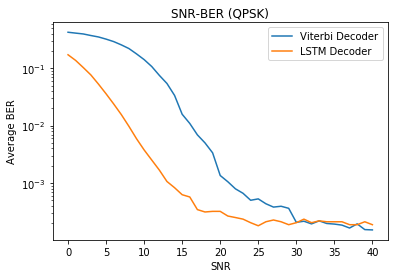

In [ ]:
import matplotlib.pyplot as plt 


plt.semilogy(snr, av_ber_test, label = "Viterbi Decoder") 

plt.semilogy(snr,av_ber_ls_test, label="LSTM Decoder")


  
# naming the x axis 
plt.xlabel('SNR') 
# naming the y axis 
plt.ylabel('Average BER') 
# giving a title to my graph 
plt.title('SNR-BER (QPSK)') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 